<a href="https://colab.research.google.com/github/Androoj/ml_project_netology/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%AE%D1%80%D0%BA%D0%BE%D0%B2_%D0%90_%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дипломный проект
Тема: Применение методов машинного обучения, включая регрессионный анализ, для определения уровня заработной платы по описанию вакансий

In [ ]:
#для начала выполним импорт самых базовых библиотек, которые нам могут пригодиться
import pandas as pd #для преобразования табличных данных и дальнейшей работы с DataFrame
import numpy as np #для возможной работы с векторами и проведением расчетов
import matplotlib.pyplot as plt #для создания визуализации
plt.figure(figsize=(12, 7)) #зададим сразу же размер шрифта наших графиков
import nltk #для обработки текста
from sklearn.feature_extraction.text import TfidfVectorizer #для преобразования текста в TF-IDF
from sklearn.preprocessing import MinMaxScaler #для нормализации данных
from sklearn.model_selection import train_test_split #для разбивки данных для передачи в модель машинного обучения
from sklearn.ensemble import RandomForestRegressor #модель "случайного леса"
from sklearn.ensemble import GradientBoostingRegressor #модель "градиентного бустинга"
from sklearn.metrics import mean_squared_error #для расчета метрики RMSE
from math import sqrt #для расчета метрики RMSE

<Figure size 1200x700 with 0 Axes>

In [ ]:
#выполним преобразование наших данных из формата xlsx в формат DataFrame
data = pd.read_csv('job_postings.csv') #загрузка наших данных в формат DataFrame
data #посмотрим на наш датафрейм

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1708301126000,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1695426553000,NaN,NaN,NaN,1692834553000,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1695321872000,NaN,NaN,NaN,1692729872000,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1695424007000,NaN,NaN,NaN,1692832007000,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1708419602000,NaN,NaN,NaN,1692867714000,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,1695336734000,NaN,Entry level,NaN,1692744734000,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,1695336368000,NaN,Entry level,NaN,1692744368000,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,1695336368000,NaN,Entry level,NaN,1692744368000,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,1695336071000,NaN,Mid-Senior level,NaN,1692744071000,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


In [ ]:
#после загрузки нашего датасета посмотрим, сколько в нашей таблице пропущенных значений
data.isnull().sum()

job_id                            0
company_id                      366
title                             0
description                       1
max_salary                    10365
med_salary                    14905
min_salary                    10365
pay_period                     9384
formatted_work_type               0
location                          0
applies                        7186
original_listed_time              0
remote_allowed                13546
views                          2763
job_posting_url                   0
application_url                6091
application_type                  0
expiry                            0
closed_time                   14958
formatted_experience_level     4902
skills_desc                   15742
listed_time                       0
posting_domain                 6842
sponsored                         0
work_type                         0
currency                       9384
compensation_type              9384
dtype: int64

In [ ]:
#проверим есть ли дубликаты в столбце "job_id"
data['job_id'].duplicated().sum()

0

Поскольку наша задача заключается в нахождении минимальной и максимальной зарплате по компаниям: удалим те строки, где нет данной информации

In [ ]:
data = data.dropna(subset=['max_salary', 'min_salary']).reset_index(drop = True) #удаляем пустые значения по максимальной и минимальной зарплате и сбрасываем номера индексов
data #сразу же выведем результат

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.00,NaN,45760.00,YEARLY,Full-time,"Chico, CA",...,1708301126000,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY
1,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.00,NaN,37000.00,YEARLY,Full-time,"Albany, GA",...,1708284074000,NaN,NaN,NaN,1692732089000,NaN,1,FULL_TIME,USD,BASE_SALARY
2,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.00,NaN,50.00,HOURLY,Part-time,"Muskegon, MI",...,1695328958000,NaN,NaN,NaN,1692736958000,NaN,0,PART_TIME,USD,BASE_SALARY
3,1535492735,NaN,Administrative Assistant,We are looking for a responsible Administrativ...,20.00,NaN,18.00,HOURLY,Part-time,"Ocoee, FL",...,1708287159000,NaN,NaN,NaN,1692735159000,NaN,0,PART_TIME,USD,BASE_SALARY
4,1657978824,89350959.0,"REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30...","REMOTE WORK FROM HOME $1,000 TO $10,000 COMMIS...",12000.00,NaN,12000.00,MONTHLY,Contract,"Texas, United States",...,1708386056000,NaN,NaN,NaN,1692834056000,NaN,0,CONTRACT,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,3701373383,13651.0,Senior Analyst,About Us\nMarketAxess is on a journey to digit...,85000.00,NaN,75000.00,YEARLY,Full-time,"New York, NY",...,1695335468000,NaN,Mid-Senior level,NaN,1692743468000,boards.greenhouse.io,0,FULL_TIME,USD,BASE_SALARY
5517,3701373385,18312164.0,Sales Manager,"Sales ManagerTexas, US $60,000–$70,000OTE $250...",70000.00,NaN,60000.00,YEARLY,Full-time,"Texas, United States",...,1695334754000,NaN,Mid-Senior level,NaN,1692742754000,NaN,0,FULL_TIME,USD,BASE_SALARY
5518,3701373427,1321042.0,Design Intern,Looking to redefine the skyline or to be a par...,23.89,NaN,19.08,HOURLY,Internship,"Miramar, FL",...,1695335546000,NaN,Mid-Senior level,NaN,1692743546000,workforcenow.adp.com,0,INTERNSHIP,USD,BASE_SALARY
5519,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),Overview\nTHE ROLE:\nThe Senior Bilingual Copy...,105200.00,NaN,91900.00,YEARLY,Full-time,"Torrance, CA",...,1695335629000,NaN,Mid-Senior level,NaN,1692743629000,herbalifecareers.ttcportals.com,0,FULL_TIME,USD,BASE_SALARY


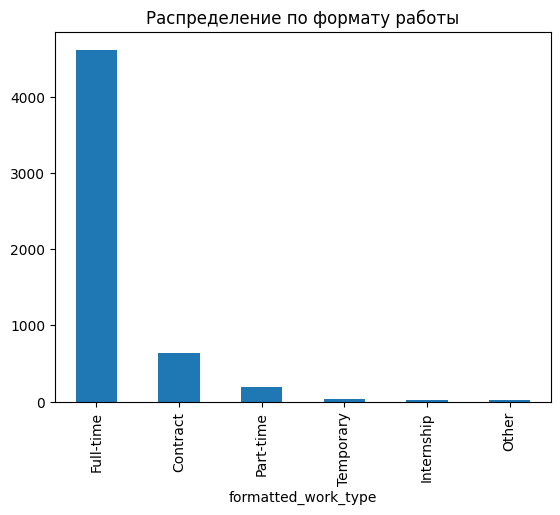

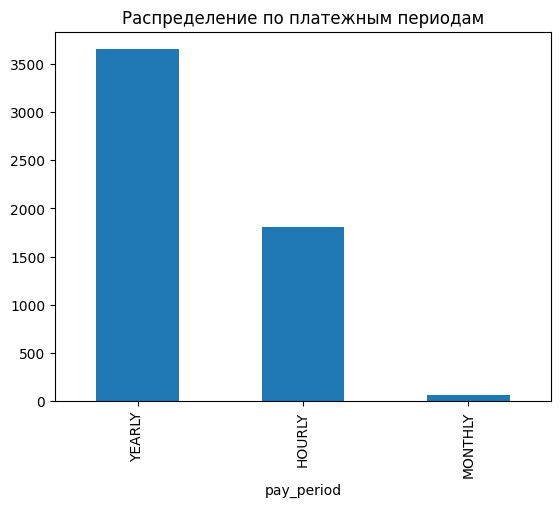

In [ ]:
#Посмотрим как распределяется формат работы и платежные периоды по вакансиям
data_job_type = data['formatted_work_type'].value_counts()
data_pay_period = data['pay_period'].value_counts()
data_job_type.plot(kind = 'bar')
plt.title('Распределение по формату работы')
plt.show()
data_pay_period.plot(kind = 'bar')
plt.title('Распределение по платежным периодам')
plt.show()

In [ ]:
#Оставим только те вакансии, где требуется специалист на "full-time" работу
data = data[data['formatted_work_type'] == 'Full-time'].reset_index(drop = True)
data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1708301126000,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY
1,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.0,NaN,37000.0,YEARLY,Full-time,"Albany, GA",...,1708284074000,NaN,NaN,NaN,1692732089000,NaN,1,FULL_TIME,USD,BASE_SALARY
2,2148434586,2780388.0,"Manager, Salesforce Platform",Invitation Homes is a fast-paced evolving publ...,170976.0,NaN,98640.0,YEARLY,Full-time,"New Hampshire, United States",...,1695446273000,NaN,Mid-Senior level,NaN,1692854273000,invitationhomes.wd1.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY
3,2148434616,15564.0,"Lead Solar Maintenance Roofer, Residential Ser...",What to Expect\n The Lead Service Installer wi...,46.0,NaN,19.0,HOURLY,Full-time,"San Diego, CA",...,1695446349000,NaN,Mid-Senior level,NaN,1692854349000,www.tesla.com,0,FULL_TIME,USD,BASE_SALARY
4,2148434725,13074.0,Mental Health Professional,"You Belong Here.\nAt MultiCare, we strive to o...",79541.0,NaN,55280.0,YEARLY,Full-time,"Spokane, WA",...,1695447607000,NaN,Entry level,NaN,1692855607000,multicare.wd1.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,3701373317,15259054.0,Equipment Maintenance Technician- Automotive P...,An international manufacturer of automotive pa...,30.0,NaN,20.0,HOURLY,Full-time,"Dayton, OH",...,1695334675000,NaN,Mid-Senior level,NaN,1692742675000,NaN,0,FULL_TIME,USD,BASE_SALARY
4615,3701373383,13651.0,Senior Analyst,About Us\nMarketAxess is on a journey to digit...,85000.0,NaN,75000.0,YEARLY,Full-time,"New York, NY",...,1695335468000,NaN,Mid-Senior level,NaN,1692743468000,boards.greenhouse.io,0,FULL_TIME,USD,BASE_SALARY
4616,3701373385,18312164.0,Sales Manager,"Sales ManagerTexas, US $60,000–$70,000OTE $250...",70000.0,NaN,60000.0,YEARLY,Full-time,"Texas, United States",...,1695334754000,NaN,Mid-Senior level,NaN,1692742754000,NaN,0,FULL_TIME,USD,BASE_SALARY
4617,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),Overview\nTHE ROLE:\nThe Senior Bilingual Copy...,105200.0,NaN,91900.0,YEARLY,Full-time,"Torrance, CA",...,1695335629000,NaN,Mid-Senior level,NaN,1692743629000,herbalifecareers.ttcportals.com,0,FULL_TIME,USD,BASE_SALARY


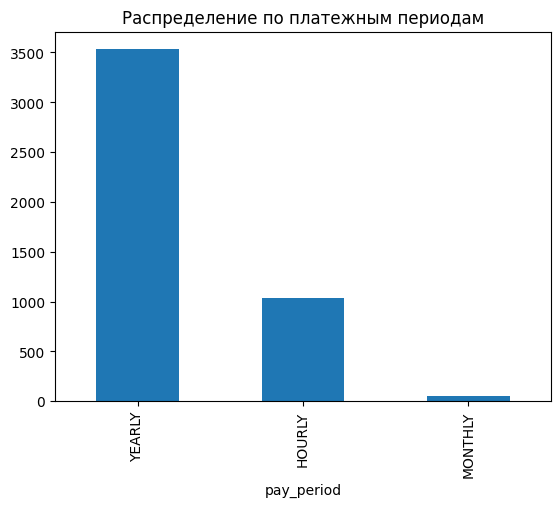

In [ ]:
#Посмотрим на распределение по платежным периодам после выполненных преобразований
data_pay_period_full_time = data['pay_period'].value_counts()
data_pay_period_full_time.plot(kind = 'bar')
plt.title('Распределение по платежным периодам')
plt.show()

In [ ]:
#Выполним преобразование данных в максимальной и минимальной зарплате. Изменим расчетный период равным годом. По данным из открытых источников, в среднем в год в США работают 1757 часов
data.loc[data['pay_period'] == 'HOURLY', 'max_salary'] = data['max_salary'] * 1757
data.loc[data['pay_period'] == 'HOURLY', 'min_salary'] = data['min_salary'] * 1757
data.loc[data['pay_period'] == 'MONTHLY', 'max_salary'] = data['max_salary'] * 12
data.loc[data['pay_period'] == 'MONTHLY', 'min_salary'] = data['min_salary'] * 12
data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1708301126000,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY
1,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.0,NaN,37000.0,YEARLY,Full-time,"Albany, GA",...,1708284074000,NaN,NaN,NaN,1692732089000,NaN,1,FULL_TIME,USD,BASE_SALARY
2,2148434586,2780388.0,"Manager, Salesforce Platform",Invitation Homes is a fast-paced evolving publ...,170976.0,NaN,98640.0,YEARLY,Full-time,"New Hampshire, United States",...,1695446273000,NaN,Mid-Senior level,NaN,1692854273000,invitationhomes.wd1.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY
3,2148434616,15564.0,"Lead Solar Maintenance Roofer, Residential Ser...",What to Expect\n The Lead Service Installer wi...,80822.0,NaN,33383.0,HOURLY,Full-time,"San Diego, CA",...,1695446349000,NaN,Mid-Senior level,NaN,1692854349000,www.tesla.com,0,FULL_TIME,USD,BASE_SALARY
4,2148434725,13074.0,Mental Health Professional,"You Belong Here.\nAt MultiCare, we strive to o...",79541.0,NaN,55280.0,YEARLY,Full-time,"Spokane, WA",...,1695447607000,NaN,Entry level,NaN,1692855607000,multicare.wd1.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,3701373317,15259054.0,Equipment Maintenance Technician- Automotive P...,An international manufacturer of automotive pa...,52710.0,NaN,35140.0,HOURLY,Full-time,"Dayton, OH",...,1695334675000,NaN,Mid-Senior level,NaN,1692742675000,NaN,0,FULL_TIME,USD,BASE_SALARY
4615,3701373383,13651.0,Senior Analyst,About Us\nMarketAxess is on a journey to digit...,85000.0,NaN,75000.0,YEARLY,Full-time,"New York, NY",...,1695335468000,NaN,Mid-Senior level,NaN,1692743468000,boards.greenhouse.io,0,FULL_TIME,USD,BASE_SALARY
4616,3701373385,18312164.0,Sales Manager,"Sales ManagerTexas, US $60,000–$70,000OTE $250...",70000.0,NaN,60000.0,YEARLY,Full-time,"Texas, United States",...,1695334754000,NaN,Mid-Senior level,NaN,1692742754000,NaN,0,FULL_TIME,USD,BASE_SALARY
4617,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),Overview\nTHE ROLE:\nThe Senior Bilingual Copy...,105200.0,NaN,91900.0,YEARLY,Full-time,"Torrance, CA",...,1695335629000,NaN,Mid-Senior level,NaN,1692743629000,herbalifecareers.ttcportals.com,0,FULL_TIME,USD,BASE_SALARY


In [ ]:
#Изменим значение всего столбца "pay_period" на "YEARLY" после преобразования данных
data.loc[data['pay_period'] != 'YEARLY', 'pay_period'] = 'YEARLY'
data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1708301126000,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY
1,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.0,NaN,37000.0,YEARLY,Full-time,"Albany, GA",...,1708284074000,NaN,NaN,NaN,1692732089000,NaN,1,FULL_TIME,USD,BASE_SALARY
2,2148434586,2780388.0,"Manager, Salesforce Platform",Invitation Homes is a fast-paced evolving publ...,170976.0,NaN,98640.0,YEARLY,Full-time,"New Hampshire, United States",...,1695446273000,NaN,Mid-Senior level,NaN,1692854273000,invitationhomes.wd1.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY
3,2148434616,15564.0,"Lead Solar Maintenance Roofer, Residential Ser...",What to Expect\n The Lead Service Installer wi...,80822.0,NaN,33383.0,YEARLY,Full-time,"San Diego, CA",...,1695446349000,NaN,Mid-Senior level,NaN,1692854349000,www.tesla.com,0,FULL_TIME,USD,BASE_SALARY
4,2148434725,13074.0,Mental Health Professional,"You Belong Here.\nAt MultiCare, we strive to o...",79541.0,NaN,55280.0,YEARLY,Full-time,"Spokane, WA",...,1695447607000,NaN,Entry level,NaN,1692855607000,multicare.wd1.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,3701373317,15259054.0,Equipment Maintenance Technician- Automotive P...,An international manufacturer of automotive pa...,52710.0,NaN,35140.0,YEARLY,Full-time,"Dayton, OH",...,1695334675000,NaN,Mid-Senior level,NaN,1692742675000,NaN,0,FULL_TIME,USD,BASE_SALARY
4615,3701373383,13651.0,Senior Analyst,About Us\nMarketAxess is on a journey to digit...,85000.0,NaN,75000.0,YEARLY,Full-time,"New York, NY",...,1695335468000,NaN,Mid-Senior level,NaN,1692743468000,boards.greenhouse.io,0,FULL_TIME,USD,BASE_SALARY
4616,3701373385,18312164.0,Sales Manager,"Sales ManagerTexas, US $60,000–$70,000OTE $250...",70000.0,NaN,60000.0,YEARLY,Full-time,"Texas, United States",...,1695334754000,NaN,Mid-Senior level,NaN,1692742754000,NaN,0,FULL_TIME,USD,BASE_SALARY
4617,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),Overview\nTHE ROLE:\nThe Senior Bilingual Copy...,105200.0,NaN,91900.0,YEARLY,Full-time,"Torrance, CA",...,1695335629000,NaN,Mid-Senior level,NaN,1692743629000,herbalifecareers.ttcportals.com,0,FULL_TIME,USD,BASE_SALARY


In [ ]:
data = data.dropna(subset=['company_id']).reset_index(drop = True) #удаляем пустые значения по id_company и сбрасываем номера индексов
data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.0,NaN,37000.0,YEARLY,Full-time,"Albany, GA",...,1708284074000,NaN,NaN,NaN,1692732089000,NaN,1,FULL_TIME,USD,BASE_SALARY
1,2148434586,2780388.0,"Manager, Salesforce Platform",Invitation Homes is a fast-paced evolving publ...,170976.0,NaN,98640.0,YEARLY,Full-time,"New Hampshire, United States",...,1695446273000,NaN,Mid-Senior level,NaN,1692854273000,invitationhomes.wd1.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY
2,2148434616,15564.0,"Lead Solar Maintenance Roofer, Residential Ser...",What to Expect\n The Lead Service Installer wi...,80822.0,NaN,33383.0,YEARLY,Full-time,"San Diego, CA",...,1695446349000,NaN,Mid-Senior level,NaN,1692854349000,www.tesla.com,0,FULL_TIME,USD,BASE_SALARY
3,2148434725,13074.0,Mental Health Professional,"You Belong Here.\nAt MultiCare, we strive to o...",79541.0,NaN,55280.0,YEARLY,Full-time,"Spokane, WA",...,1695447607000,NaN,Entry level,NaN,1692855607000,multicare.wd1.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY
4,2148434726,13074.0,Mental Health Professional,"You Belong Here.\nAt MultiCare, we strive to o...",79541.0,NaN,55280.0,YEARLY,Full-time,"Spokane, WA",...,1695447607000,NaN,Entry level,NaN,1692855607000,multicare.wd1.myworkdayjobs.com,0,FULL_TIME,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,3701373317,15259054.0,Equipment Maintenance Technician- Automotive P...,An international manufacturer of automotive pa...,52710.0,NaN,35140.0,YEARLY,Full-time,"Dayton, OH",...,1695334675000,NaN,Mid-Senior level,NaN,1692742675000,NaN,0,FULL_TIME,USD,BASE_SALARY
4518,3701373383,13651.0,Senior Analyst,About Us\nMarketAxess is on a journey to digit...,85000.0,NaN,75000.0,YEARLY,Full-time,"New York, NY",...,1695335468000,NaN,Mid-Senior level,NaN,1692743468000,boards.greenhouse.io,0,FULL_TIME,USD,BASE_SALARY
4519,3701373385,18312164.0,Sales Manager,"Sales ManagerTexas, US $60,000–$70,000OTE $250...",70000.0,NaN,60000.0,YEARLY,Full-time,"Texas, United States",...,1695334754000,NaN,Mid-Senior level,NaN,1692742754000,NaN,0,FULL_TIME,USD,BASE_SALARY
4520,3701373493,5619.0,Sr. Bilingual Copywriter (Canadian French),Overview\nTHE ROLE:\nThe Senior Bilingual Copy...,105200.0,NaN,91900.0,YEARLY,Full-time,"Torrance, CA",...,1695335629000,NaN,Mid-Senior level,NaN,1692743629000,herbalifecareers.ttcportals.com,0,FULL_TIME,USD,BASE_SALARY


In [ ]:
#присоединим таблицу с наименованием компаний
data_companies = pd.read_csv('companies.csv') #загрузка наших данных в формат DataFrame
data = data.merge(data_companies, on = 'company_id', how = 'left')
data[['name', 'description_x', 'max_salary', 'min_salary']] #выведем на экран необходимые метрики

,name,description_x,max_salary,min_salary
0,Sunnyland Farms,Provide clerical and administrative support to...,42000.0,37000.0
1,Invitation Homes,Invitation Homes is a fast-paced evolving publ...,170976.0,98640.0
2,Tesla,What to Expect\n The Lead Service Installer wi...,80822.0,33383.0
3,MultiCare Health System,"You Belong Here.\nAt MultiCare, we strive to o...",79541.0,55280.0
4,MultiCare Health System,"You Belong Here.\nAt MultiCare, we strive to o...",79541.0,55280.0
...,...,...,...,...
4517,Activ8 Recruitment & Solutions,An international manufacturer of automotive pa...,52710.0,35140.0
4518,MarketAxess,About Us\nMarketAxess is on a journey to digit...,85000.0,75000.0
4519,Bravado,"Sales ManagerTexas, US $60,000–$70,000OTE $250...",70000.0,60000.0
4520,Herbalife,Overview\nTHE ROLE:\nThe Senior Bilingual Copy...,105200.0,91900.0


In [ ]:
#посмотрим на распределение значений по компаниям
data_company_values = data['name'].value_counts()
data_company = pd.DataFrame({'Name': data_company_values.index, 'vals': data_company_values.values})
data_company

,Name,vals
0,Google,93
1,Verizon,75
2,Booz Allen Hamilton,66
3,Amazon,55
4,Robert Half,45
...,...,...
2115,Ohio Department of Rehabilitation and Correcti...,1
2116,St. John's Community Care,1
2117,Team GO,1
2118,Omron Automation,1


In [ ]:
#Посмотрим сколько компаний выложили только одну вакансию
data_company[data_company['vals'] == 1].count()

Name    1479
vals    1479
dtype: int64

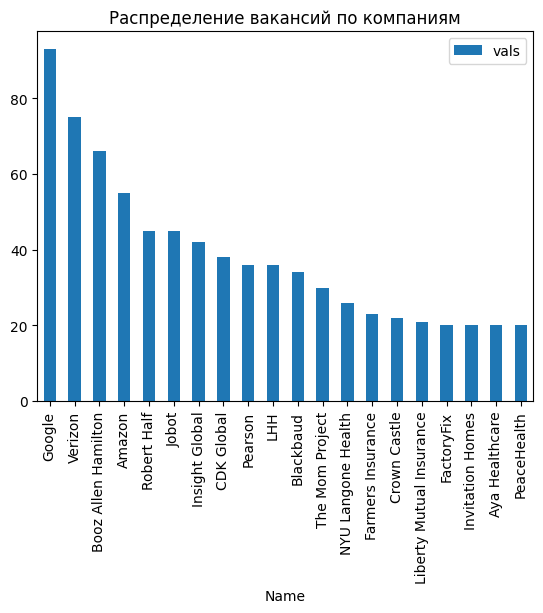

In [ ]:
#посмотрим на диаграмму по компаниям, выложившие не меньше 20 вакансий
data_company = data_company[data_company['vals'] >= 20]
data_company.plot(x = 'Name', y = 'vals', kind = 'bar')
plt.title('Распределение вакансий по компаниям')
plt.show()

Переходим к шагу преобразования данных для передачи их в модель машинного обучения

In [ ]:
#Выполним нормализацию данных по максимальной и минимальной зарплате
trans_normalization = MinMaxScaler() #инициализуем
data_normalization = trans_normalization.fit_transform(data[['max_salary', 'min_salary']]) #обучаем и трансформируем
data_normalization #смотрим результат

array([[0.03229653, 0.04623212],
       [0.13150998, 0.12328356],
       [0.06215995, 0.04171078],
       ...,
       [0.05383524, 0.07498266],
       [0.08091247, 0.1148584 ],
       [0.10383581, 0.13748383]])

In [ ]:
#преобразуем наши нормализованные данные в DataFrame
data_salary_norm = pd.DataFrame(data_normalization, columns = ['max_salary', 'min_salary'])
data_salary_norm

,max_salary,min_salary
0,0.032297,0.046232
1,0.131510,0.123284
2,0.062160,0.041711
3,0.061175,0.069083
4,0.061175,0.069083
...,...,...
4517,0.040535,0.043907
4518,0.065374,0.093733
4519,0.053835,0.074983
4520,0.080912,0.114858


In [ ]:
#Выполним One-Hot Encoding для преобразования данных по именам компаний
data_ohe = data['name']
data_companies_ohe = pd.get_dummies(data_ohe, columns=['name'])
data_companies_ohe.head()

,1 Hotels,1Community,"1st Fruits Consulting, Inc.",24 Seven Talent,"4Staff, LLC",A to Z Insurance Services,A+E Networks,"A10 Networks, Inc","AAA Northern California, Nevada & Utah",ABC 10News San Diego | KGTV Channel 10,...,iRiS Recruiting Solutions,iSpring Water Systems,kate spade new york,lululemon,myPlace Health,"myTOD, LLC",nextSource,the LEGO Group,ttg Talent Solutions,Èccolo
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Выполним предобработку текстовой информации в описании вакансии
data_vacations_text = data['description_x'].str.lower().tolist() #выделим наши описания вакансий в отдельную переменную и переведем все в нижний регистр
data_vacations_text[0] #посмотрим на первое описание

'provide clerical and administrative support to management as requestedanswer phone calls and perform higher-level data entry relating to customer serviceprocess larger, more complicated customer orders and complaints and follow-up when necessaryprocess customer accounts and file documentsfollow communication procedures, guidelines, and policies, taking the extra mile to engage larger, more complex customersprovide accurate and timely information including product costs and standard costs for new productsanalyze manufacturing processes in coordination with plant managers to improve decision-makingalign projects with various accounting and customer experience needsother duties as needed\n'

In [ ]:
nltk.download('stopwords') #загрузим стоп-слова
from nltk.corpus import stopwords #импортируем

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#выделим стоп-слова и знаки препинания в отдельную переменную, чтобы в дальнейшем использовать их в TF-IDF преобразовании
from string import punctuation #импортируем знаки пунктуации
stop_words_ = stopwords.words('english') + list(punctuation) #создадим для них отдельную переменную
stop_words_[0:15] #посмотрим на результат

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [ ]:
#Теперь выполним лемматизацию. Будем пользоваться библиотекой pymystem3.
!pip install pymystem3 #установим ее
from pymystem3 import Mystem #и сразу же инициализируем
mystem_analyzer = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
#Выполним лемматизацию всего текста
data_vacations_text_test_lem = []
for text in data_vacations_text:
  mystem_analyzer.lemmatize(text)
  data_vacations_text_test_lem.append(''.join(text))

In [ ]:
#Преобразуем текст описания вакансии в привычный для модели вид с помощью TF-IDF преобразования
tfidf_vec = TfidfVectorizer(stop_words = stop_words_)
bow_tfidf = tfidf_vec.fit_transform(data_vacations_text_test_lem) #создаем мешок слов, она же будет предиктором

In [ ]:
#Соединим все наши полученные признаки в единный датафрейм
data_description = pd.DataFrame(bow_tfidf.toarray())
data_description_name_companies = pd.concat([data_description, data_companies_ohe], axis = 1)
data_description_name_companies.columns = data_description_name_companies.columns.astype(str)
data_description_name_companies #выведем итоговый результат

,0,1,2,3,4,5,6,7,8,9,...,iRiS Recruiting Solutions,iSpring Water Systems,kate spade new york,lululemon,myPlace Health,"myTOD, LLC",nextSource,the LEGO Group,ttg Talent Solutions,Èccolo
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.030503,0.021319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.052928,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.073998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.073998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Выделим 2 целевые переменные (для максимальной и минимальной зарплаты) для дальнейшей передачи их в модели машинного обучения. Будем обучать модель для каждой целевой переменной.
y_max = data_salary_norm['max_salary'] #выделим целевую переменную для максимальной зарплаты
y_min = data_salary_norm['min_salary'] #выделим целевую переменную для минимальной зарплаты

1.1 Обучим модель "случайного леса" для нахождения максимальной зарплаты

In [ ]:
RFR = RandomForestRegressor(n_estimators = 60) #инициализируем нашу модель с выбранным параметром количества деревьев

In [ ]:
X_train_RFR, X_test_RFR, y_max_train_RFR, y_max_test_RFR = train_test_split(data_description_name_companies, y_max, test_size=0.25, random_state=22) #разделяем выборку

In [ ]:
RFR.fit(X_train_RFR, y_max_train_RFR) #обучаем нашу модель

RandomForestRegressor(n_estimators=60)

In [ ]:
#Посмотрим на результат нашей модели
print(f'Коэффициент детерминации (R2) на обучающем наборе данных: {RFR.score(X_train_RFR, y_max_train_RFR)}')
print(f'Коэффициент детерминации (R2) на тестовом наборе данных: {RFR.score(X_test_RFR, y_max_test_RFR)}')

Коэффициент детерминации (R2) на обучающем наборе данных: 0.9288074570032416
Коэффициент детерминации (R2) на тестовом наборе данных: 0.6676897292765915


In [ ]:
#Рассчитаем метрику RMSE на тестовых данных
RFR_predict = RFR.predict(X_test_RFR)
print(f'Метрика RMSE на тестовом наборе данных: {sqrt(mean_squared_error(y_max_test_RFR, RFR_predict))}')

Метрика RMSE на тестовом наборе данных: 0.049168198735360956


2.1 Обучим модель "случайного леса" для нахождения минимальной зарплаты

In [ ]:
X_train_RFR, X_test_RFR, y_min_train_RFR, y_min_test_RFR = train_test_split(data_description_name_companies, y_min, test_size=0.25, random_state=22) #разделяем выборку

In [ ]:
RFR.fit(X_train_RFR, y_min_train_RFR) #обучаем нашу модель

RandomForestRegressor(n_estimators=60)

In [ ]:
#Посмотрим на результат нашей модели
print(f'Коэффициент детерминации (R2) на обучающем наборе данных: {RFR.score(X_train_RFR, y_min_train_RFR)}')
print(f'Коэффициент детерминации (R2) на тестовом наборе данных: {RFR.score(X_test_RFR, y_min_test_RFR)}')

Коэффициент детерминации (R2) на обучающем наборе данных: 0.9325583087578904
Коэффициент детерминации (R2) на тестовом наборе данных: 0.5825654712932677


In [ ]:
#Рассчитаем метрику RMSE на тестовых данных
RFR_predict = RFR.predict(X_test_RFR)
print(f'Метрика RMSE на тестовом наборе данных: {sqrt(mean_squared_error(y_min_test_RFR, RFR_predict))}')

Метрика RMSE на тестовом наборе данных: 0.03570632283850486


1.2 Обучим модель "градиентного бустинга" для нахождения максимальной зарплаты

In [ ]:
GBR = GradientBoostingRegressor(max_depth = 5) #инициализируем нашу модель, предварительно выбрав глубину дерева

In [ ]:
X_train_GBR, X_test_GBR, y_max_train_GBR, y_max_test_GBR = train_test_split(data_description_name_companies, y_max, test_size=0.25, random_state=22) #разделяем выборку
GBR.fit(X_train_GBR, y_max_train_GBR) #обучаем

GradientBoostingRegressor(max_depth=5)

In [ ]:
print(f'Коэффициент детерминации (R2) на обучающем наборе данных: {GBR.score(X_train_GBR, y_max_train_GBR)}')
print(f'Коэффициент детерминации (R2) на тестовом наборе данных: {GBR.score(X_test_GBR, y_max_test_GBR)}')

Коэффициент детерминации (R2) на обучающем наборе данных: 0.9100709850431534
Коэффициент детерминации (R2) на тестовом наборе данных: 0.6789006030199272


In [ ]:
#Рассчитаем метрику RMSE на тестовых данных
GBR_predict = GBR.predict(X_test_GBR)
print(f'Метрика RMSE на тестовом наборе данных: {sqrt(mean_squared_error(y_max_test_GBR, GBR_predict))}')

Метрика RMSE на тестовом наборе данных: 0.03120184367668809


2.2 Обучим модель "градиентного бустинга" для нахождения минимальной зарплаты

In [ ]:
X_train_GBR, X_test_GBR, y_min_train_GBR, y_min_test_GBR = train_test_split(data_description_name_companies, y_min, test_size=0.25, random_state=22) #разделяем выборку
GBR.fit(X_train_GBR, y_min_train_GBR) #обучаем

GradientBoostingRegressor(max_depth=5)

In [ ]:
print(f'Коэффициент детерминации (R2) на обучающем наборе данных: {GBR.score(X_train_GBR, y_min_train_GBR)}')
print(f'Коэффициент детерминации (R2) на тестовом наборе данных: {GBR.score(X_test_GBR, y_min_test_GBR)}')

Коэффициент детерминации (R2) на обучающем наборе данных: 0.8916778638111895
Коэффициент детерминации (R2) на тестовом наборе данных: 0.6275262863706867


In [ ]:
#Рассчитаем метрику RMSE на тестовых данных
GBR_predict = GBR.predict(X_test_GBR)
print(f'Метрика RMSE на тестовом наборе данных: {sqrt(mean_squared_error(y_min_test_GBR, GBR_predict))}')

Метрика RMSE на тестовом наборе данных: 0.03372863433487319
